In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
plt.style.use('ggplot')
# import the random module
import random
import warnings
import itertools
from statsmodels.tsa.api import acf, graphics, pacf
from sklearn import neighbors
import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.metrics import RocCurveDisplay

In [2]:
def MAE(sales, forecast):
    error = sales - forecast
    return np.mean(np.abs(error))
def MAPE(sales, forecast):
    error = sales - forecast
    return np.mean(np.abs(error / sales))
def RMSE(sales, forecast):
    error = sales - forecast
    return np.sqrt(np.mean(np.square(error)))

<h1> Question 1 </h1>

In [3]:
toyota_sales = pd.read_csv("Toyota_Sales.csv")

In [4]:
toyota_sales

,Month,Index,Sales,t,tsq,tcube,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1/1/2006,1,808,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0
1,2/1/2006,2,969,2,4,8,0,1,0,0,0,0,0,0,0,0,0,0
2,3/1/2006,3,1475,3,9,27,0,0,1,0,0,0,0,0,0,0,0,0
3,4/1/2006,4,1439,4,16,64,0,0,0,1,0,0,0,0,0,0,0,0
4,5/1/2006,5,1394,5,25,125,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,8/1/2019,164,80,164,26896,4410944,0,0,0,0,0,0,0,1,0,0,0,0
164,9/1/2019,165,116,165,27225,4492125,0,0,0,0,0,0,0,0,1,0,0,0
165,10/1/2019,166,179,166,27556,4574296,0,0,0,0,0,0,0,0,0,1,0,0
166,11/1/2019,167,169,167,27889,4657463,0,0,0,0,0,0,0,0,0,0,1,0


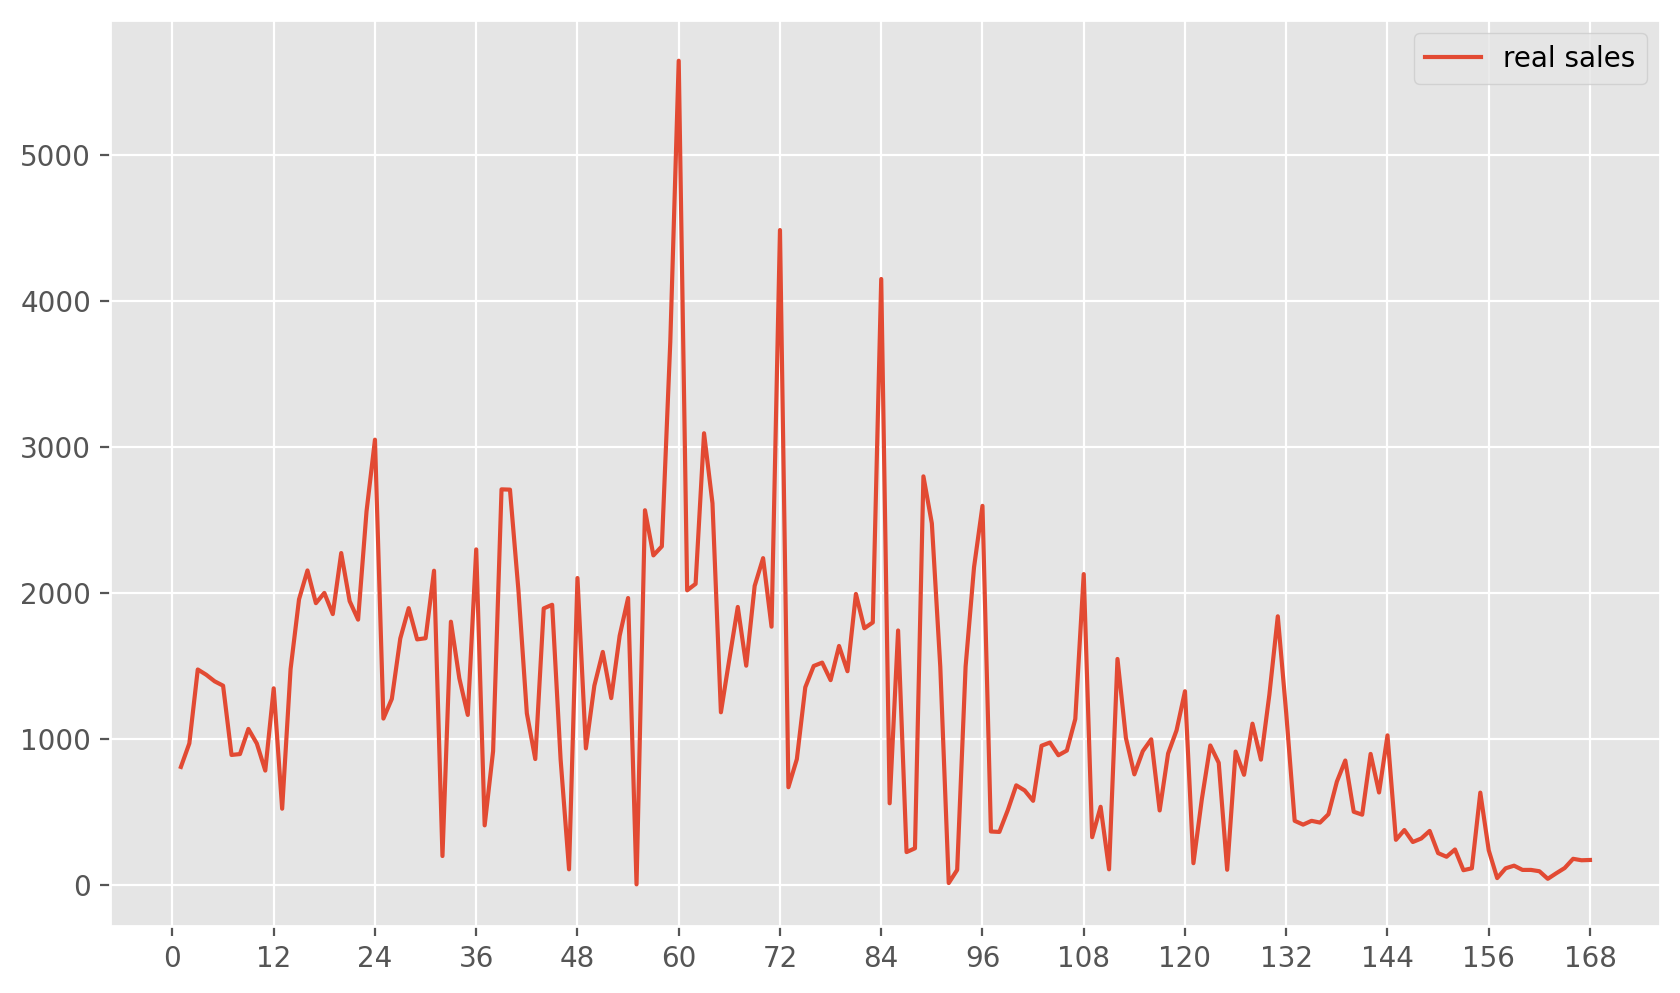

In [5]:
fig, ax = plt.subplots(figsize= (10,6), dpi = 200)
ax.plot(toyota_sales['Index'], toyota_sales['Sales'], label='real sales')
ax.set_xticks([12*i for i in range(int(len(toyota_sales)/12) + 1)])
ax.legend()
plt.show()

In [6]:
full_model = sm.OLS.from_formula('Sales ~ t + tsq + tcube + Jan + Feb + Mar + Apr + May + Jun + Jul + Aug + Oct + Nov + Dec', toyota_sales[:96])
result1 = full_model.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     3.672
Date:                Tue, 26 Apr 2022   Prob (F-statistic):           9.95e-05
Time:                        20:39:30   Log-Likelihood:                -767.46
No. Observations:                  96   AIC:                             1565.
Df Residuals:                      81   BIC:                             1603.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1369.6970    437.204      3.133      0.002     499.798    2239.596
t             -4.3960     29.980     -0.147      0.884     -64.048      55.256
tsq            0.5768      0.716      0.805      0.423      -0.848       2.002
tcube         -0.0058      0.005     -1.194      0.236      -0.015       0.004
Jan         -774.0124    392.765     -1.971      0.052   -1555.491       7.466
Feb         -322.7028    392.193     -0.823      0.413   -1103.044     457.639
Mar          106.1099    391.712      0.271      0.787    -673.275     885.494
Apr           75.3355    391.314      0.193      0.848    -703.257     853.928
May          126.2587    390.994      0.323      0.748    -651.696     904.213
Jun           51.2895    390.746      0.131      0.896    -726.172     828.751
Jul         -298.7874    390.569     -0.765      0.446   -1075.897     478.322
Aug         -294.6872    390.462     -0.755      0.453   -1071.584     482.209
Oct          -28.5661    390.463     -0.073      0.942    -805.465     748.333
Nov          126.6494    390.578      0.324      0.747    -650.479     903.778
Dec         1581.3062    390.778      4.047      0.000     803.781    2358.832
==============================================================================
Omnibus:                        1.205   Durbin-Watson:                   1.243
Prob(Omnibus):                  0.547   Jarque-Bera (JB):                0.684
Skew:                          -0.094   Prob(JB):                        0.710
Kurtosis:                       3.368   Cond. No.                     4.28e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.28e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
print("MAPE of the full regression model on training set: {}".format(MAPE(toyota_sales[0:96]['Sales'], \
                                                          result1.predict(toyota_sales[0:96]))))
print("RMSE of the full regression model on training set: {}".format(RMSE(toyota_sales[0:96]['Sales'], \
                                                          result1.predict(toyota_sales[0:96]))))
print("MSE of the full regression model on training set: {}".format(RMSE(toyota_sales[0:96]['Sales'], \
                                                          result1.predict(toyota_sales[0:96]))**2))

MAPE of the full regression model on training set: 5.75141871186084
RMSE of the full regression model on training set: 717.2574837026933
MSE of the full regression model on training set: 514458.29792751936


In [8]:
print("MAPE of the full regression model on test set: {}".format(MAPE(toyota_sales[96:168]['Sales'], \
                                                          result1.predict(toyota_sales[96:168]))))
print("RMSE of the full regression model on test set: {}".format(RMSE(toyota_sales[96:168]['Sales'], \
                                                          result1.predict(toyota_sales[96:168]))))
print("MSE of the full regression model on test set: {}".format(RMSE(toyota_sales[96:168]['Sales'], \
                                                          result1.predict(toyota_sales[96:168]))**2))

MAPE of the full regression model on test set: 23.395918099579795
RMSE of the full regression model on test set: 5005.5396738917
MSE of the full regression model on test set: 25055427.426903825


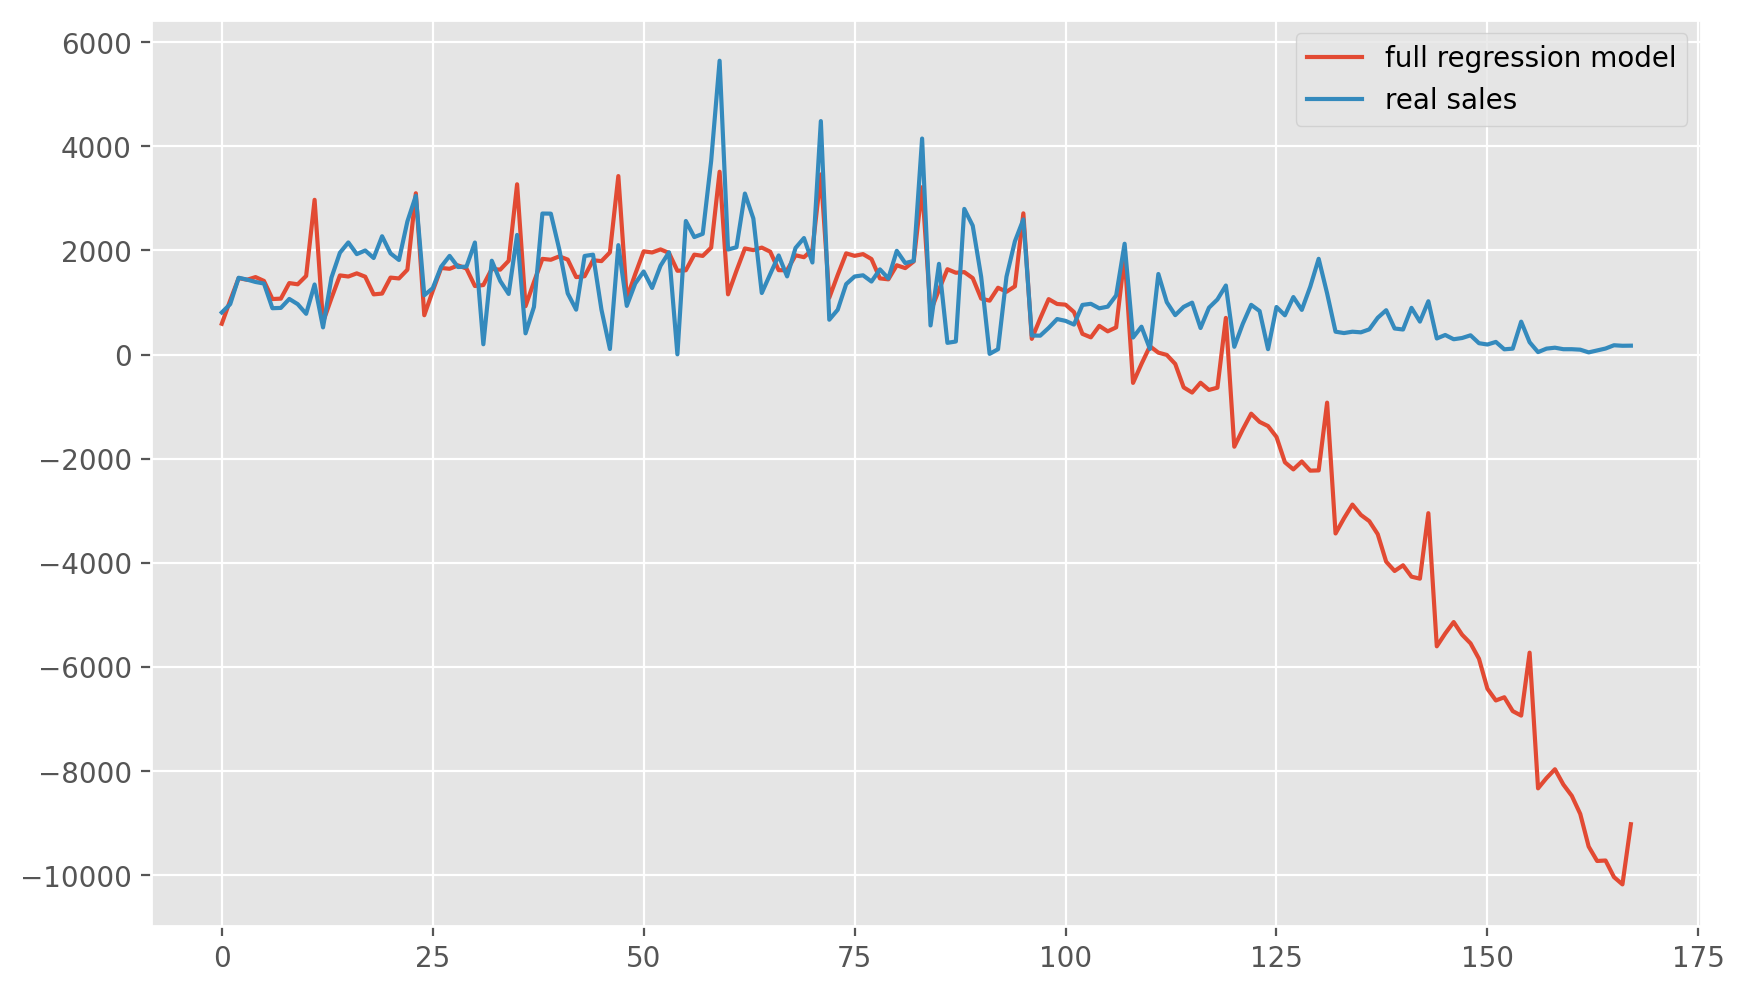

In [9]:
fig, ax = plt.subplots(figsize= (10,6), dpi = 200)
ax.plot(result1.predict(toyota_sales), label='full regression model')
ax.plot(toyota_sales['Sales'], label='real sales')
ax.legend()
plt.show()

In [10]:
reduced_model = sm.OLS.from_formula('Sales ~ t + Jan + Dec', toyota_sales[:96])
result2 = reduced_model.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     13.58
Date:                Tue, 26 Apr 2022   Prob (F-statistic):           2.07e-07
Time:                        20:39:31   Log-Likelihood:                -773.45
No. Observations:                  96   AIC:                             1555.
Df Residuals:                      92   BIC:                             1565.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1470.7058    164.729      8.928      0.000    1143.539    1797.873
t              2.6893      2.882      0.933      0.353      -3.034       8.413
Jan         -704.2213    289.611     -2.432      0.017   -1279.414    -129.029
Dec         1591.5713    289.611      5.496      0.000    1016.379    2166.764
==============================================================================
Omnibus:                        2.919   Durbin-Watson:                   1.172
Prob(Omnibus):                  0.232   Jarque-Bera (JB):                2.795
Skew:                           0.083   Prob(JB):                        0.247
Kurtosis:                       3.819   Cond. No.                         214.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
print("MAPE of the reduced regression model on training set: {}".format(MAPE(toyota_sales[0:96]['Sales'], \
                                                          result2.predict(toyota_sales[0:96]))))
print("RMSE of the reduced regression model on training set: {}".format(RMSE(toyota_sales[0:96]['Sales'], \
                                                          result2.predict(toyota_sales[0:96]))))
print("MSE of the reduced regression model on training set: {}".format(RMSE(toyota_sales[0:96]['Sales'], \
                                                          result2.predict(toyota_sales[0:96]))**2))

MAPE of the reduced regression model on training set: 6.358164058264865
RMSE of the reduced regression model on training set: 763.4325181478738
MSE of the reduced regression model on training set: 582829.2097656036


In [12]:
print("MAPE of the reduced regression model on test set: {}".format(MAPE(toyota_sales[96:168]['Sales'], \
                                                          result2.predict(toyota_sales[96:168]))))
print("RMSE of the reduced regression model on test set: {}".format(RMSE(toyota_sales[96:168]['Sales'], \
                                                          result2.predict(toyota_sales[96:168]))))
print("MSE of the reduced regression model on test set: {}".format(RMSE(toyota_sales[96:168]['Sales'], \
                                                          result2.predict(toyota_sales[96:168]))**2))

MAPE of the reduced regression model on test set: 5.996805470158502
RMSE of the reduced regression model on test set: 1426.942120277627
MSE of the reduced regression model on test set: 2036163.8146224099


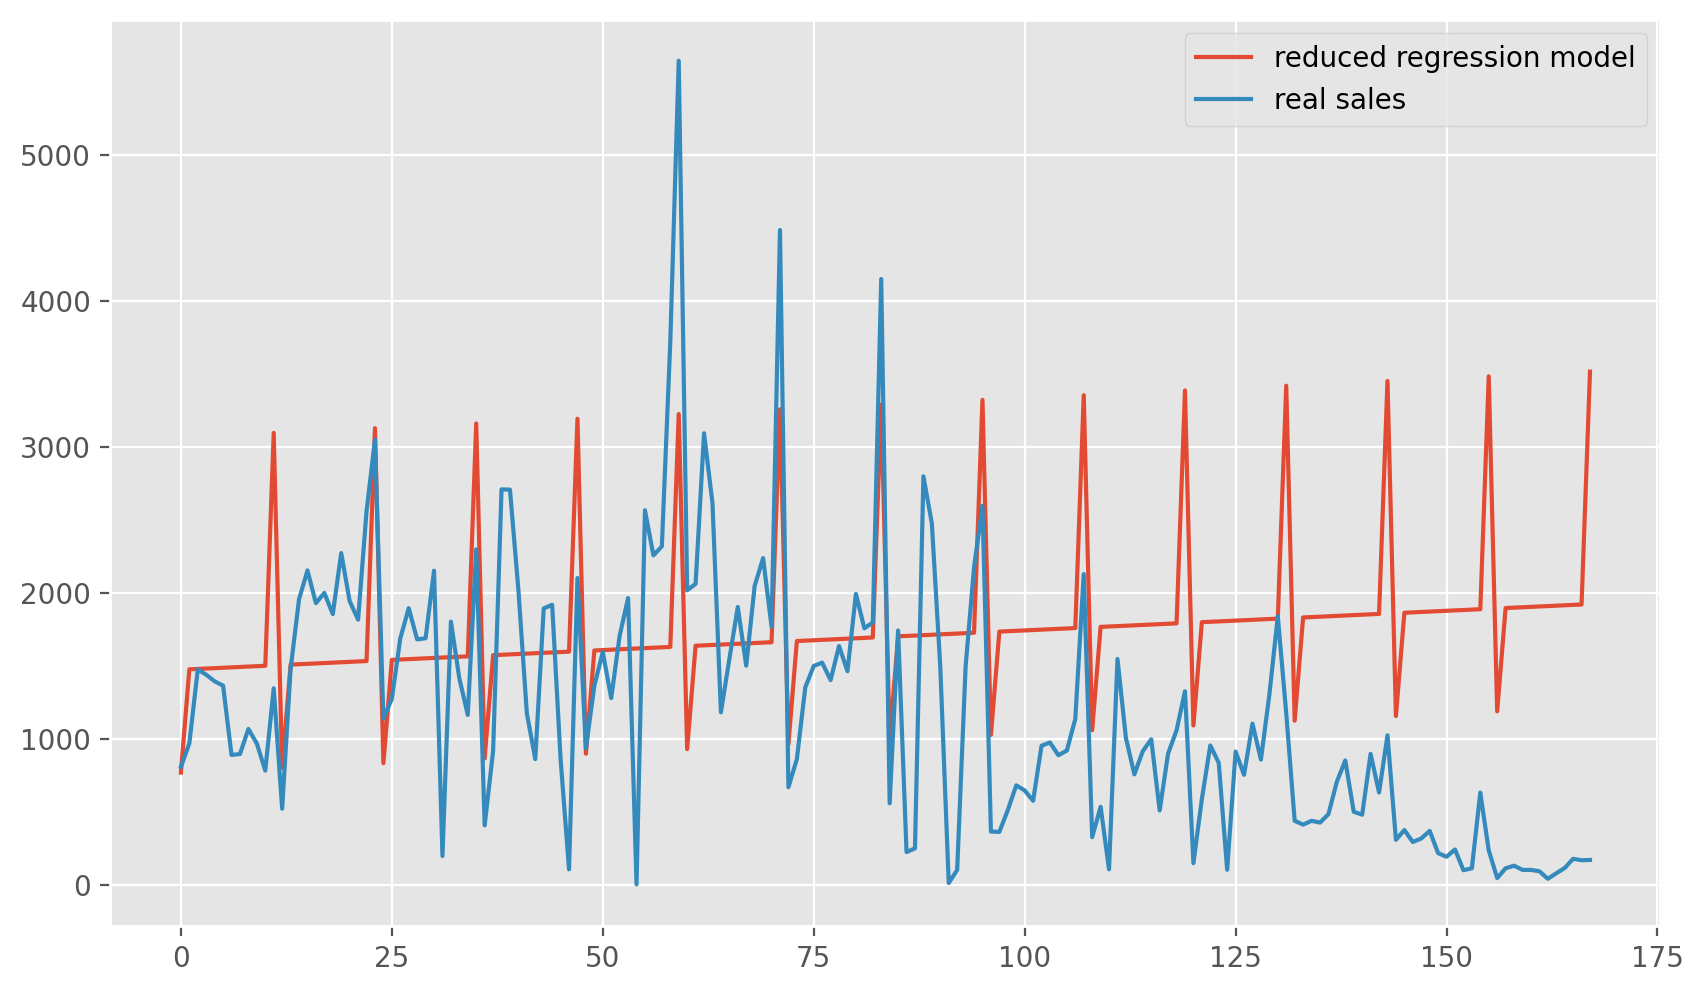

In [13]:
fig, ax = plt.subplots(figsize= (10,6), dpi = 200)
ax.plot(result2.predict(toyota_sales), label='reduced regression model')
ax.plot(toyota_sales['Sales'], label='real sales')
ax.legend()
plt.show()

<h1> Question 2 </h1>

In [14]:
toyota_sales_up = pd.read_csv("Toyota_Sales_Up.csv")

In [15]:
toyota_sales_up

,Index,Sales,Up,Sup,Lag1,Lag2,Lag3,Jan,Dec
0,1.0,808.0,NaN,NaN,NaN,NaN,NaN,1.0,0.0
1,2.0,969.0,1.0,0.0,NaN,NaN,NaN,0.0,0.0
2,3.0,1475.0,1.0,1.0,161.0,NaN,NaN,0.0,0.0
3,4.0,1439.0,0.0,0.0,506.0,161.0,NaN,0.0,0.0
4,5.0,1394.0,0.0,0.0,-36.0,506.0,161.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
formula = "Up ~ Lag1 + Lag2 + Lag3 + Jan + Dec"
log_reg1 = smf.glm(formula = formula, data = toyota_sales_up[:96], family=sm.families.Binomial())
log_reg_model1 = log_reg1.fit()
log_reg_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                     Up   No. Observations:                   92
Model:                            GLM   Df Residuals:                       86
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -43.315
Date:                Tue, 26 Apr 2022   Deviance:                       86.630
Time:                        20:39:31   Pearson chi2:                     71.2
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3479
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2034      0.260      0.783      0.434      -0.306       0.713
Lag1          -0.0014      0.000     -3.347      0.001      -0.002      -0.001
Lag2          -0.0009      0.000     -2.653      0.008      -0.002      -0.000
Lag3          -0.0005      0.000     -1.813      0.070      -0.001     4.2e-05
Jan          -21.9276   2.66e+04     -0.001      0.999   -5.21e+04     5.2e+04
Dec           24.1444   2.47e+04      0.001      0.999   -4.84e+04    4.85e+04
==============================================================================
"""

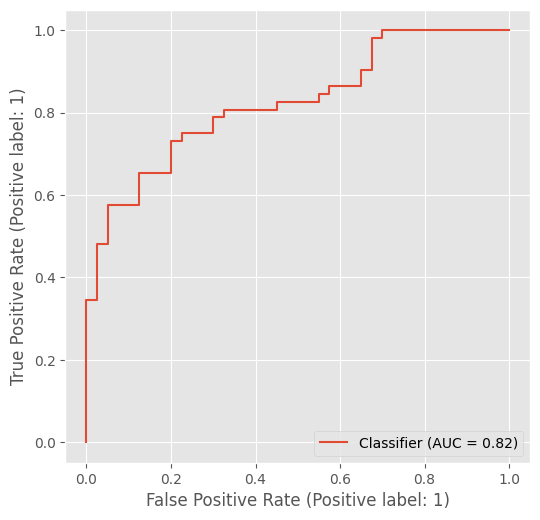

AUC score of training set: 0.82404


In [17]:
y_hat_training = log_reg_model1.predict()
fig, ax = plt.subplots(figsize = (6,6), dpi = 100)
RocCurveDisplay.from_predictions(toyota_sales_up[4:96]['Up'], y_hat_training, ax = ax)
plt.show()
print("AUC score of training set: {:.5f}".format(roc_auc_score(toyota_sales_up[4:96]['Up'], y_hat_training)))
y_hat_training = (y_hat_training >= 1/2).astype(int)

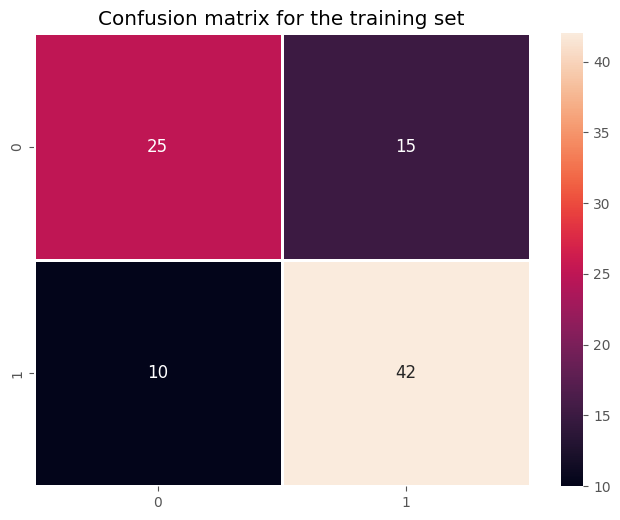

              precision    recall  f1-score   support

         0.0       0.71      0.62      0.67        40
         1.0       0.74      0.81      0.77        52

    accuracy                           0.73        92
   macro avg       0.73      0.72      0.72        92
weighted avg       0.73      0.73      0.73        92



In [18]:
fig, ax = plt.subplots(figsize = (8,6), dpi = 100)
ax.set_title("Confusion matrix for the training set")
sns.heatmap(confusion_matrix(toyota_sales_up[4:96]['Up'], y_hat_training), linewidths=1, annot=True, fmt='g', annot_kws={"fontsize":12}, ax = ax)
plt.show()
print(classification_report(toyota_sales_up[4:96]['Up'], y_hat_training))

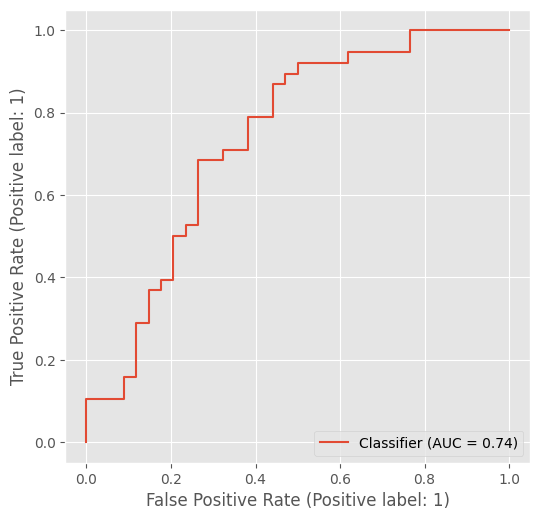

AUC score of test set: 0.73839


In [19]:
y_hat_test = log_reg_model1.predict(toyota_sales_up[96:168])
fig, ax = plt.subplots(figsize=(6,6), dpi = 100)
RocCurveDisplay.from_predictions(toyota_sales_up[96:168]['Up'], y_hat_test, ax = ax)
plt.show()
print("AUC score of test set: {:.5f}".format(roc_auc_score(toyota_sales_up[96:168]['Up'], y_hat_test)))
y_hat_test = (y_hat_test >= 1/2).astype(int)
y_hat_test = y_hat_test.reset_index().iloc[:,1]

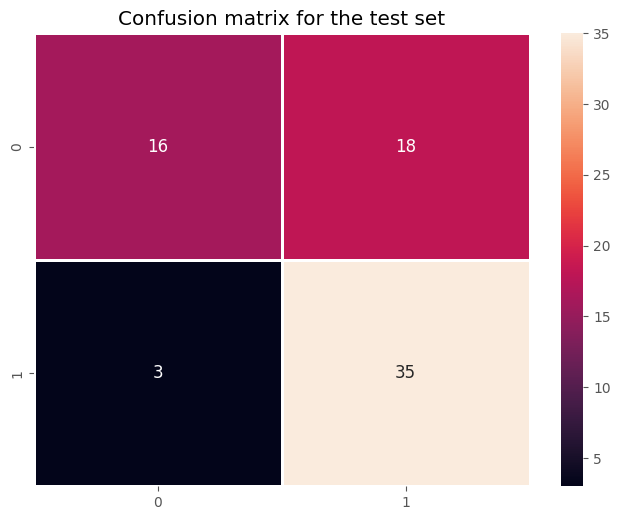

              precision    recall  f1-score   support

         0.0       0.84      0.47      0.60        34
         1.0       0.66      0.92      0.77        38

    accuracy                           0.71        72
   macro avg       0.75      0.70      0.69        72
weighted avg       0.75      0.71      0.69        72



In [20]:
fig, ax = plt.subplots(figsize = (8,6), dpi = 100)
ax.set_title("Confusion matrix for the test set")
sns.heatmap(confusion_matrix(toyota_sales_up[96:168]['Up'], y_hat_test), linewidths=1, annot=True, fmt='g', annot_kws={"fontsize":12}, ax = ax)
plt.show()
print(classification_report(toyota_sales_up[96:168]['Up'], y_hat_test))


In [21]:
formula = "Up ~ Lag1 + Lag2 + Dec"
log_reg2 = smf.glm(formula = formula, data = toyota_sales_up[:96], family=sm.families.Binomial())
log_reg_model2 = log_reg2.fit()
log_reg_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                     Up   No. Observations:                   93
Model:                            GLM   Df Residuals:                       89
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -47.130
Date:                Tue, 26 Apr 2022   Deviance:                       94.260
Time:                        20:39:31   Pearson chi2:                     80.1
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3014
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1175      0.250      0.469      0.639      -0.373       0.608
Lag1          -0.0013      0.000     -3.628      0.000      -0.002      -0.001
Lag2          -0.0006      0.000     -2.358      0.018      -0.001      -0.000
Dec           22.9878   1.51e+04      0.002      0.999   -2.95e+04    2.95e+04
==============================================================================
"""

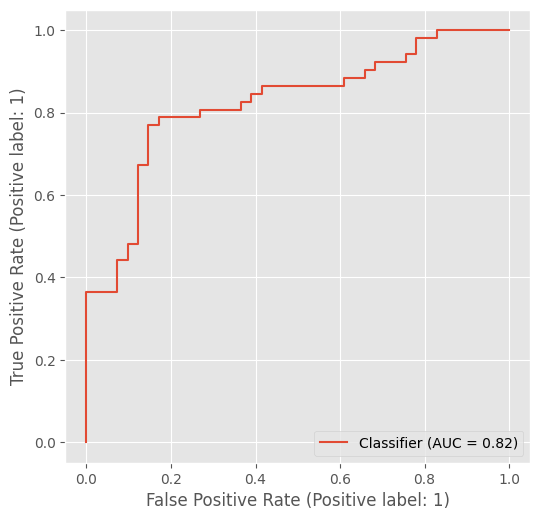

AUC score of training set: 0.82411


In [22]:
y_hat_train = log_reg_model2.predict()
fig, ax = plt.subplots(figsize=(6,6), dpi = 100)
RocCurveDisplay.from_predictions(toyota_sales_up[3:96]['Up'], y_hat_train, ax = ax)
plt.show()
print("AUC score of training set: {:.5f}".format(roc_auc_score(toyota_sales_up[3:96]['Up'], y_hat_train)))
y_hat_train = (y_hat_train >= 0.5).astype(int)

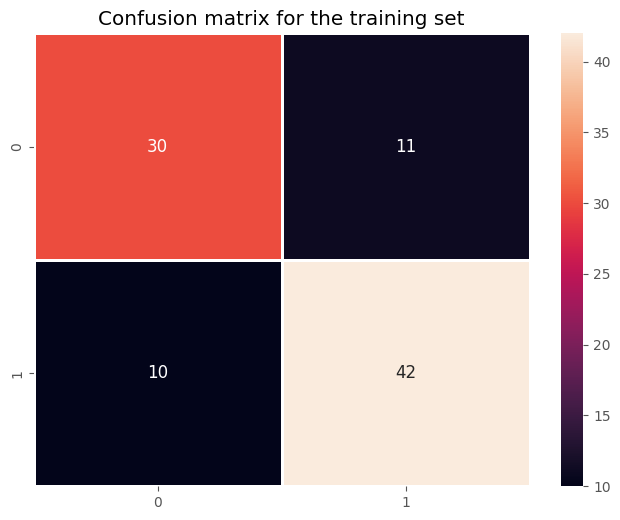

              precision    recall  f1-score   support

         0.0       0.75      0.73      0.74        41
         1.0       0.79      0.81      0.80        52

    accuracy                           0.77        93
   macro avg       0.77      0.77      0.77        93
weighted avg       0.77      0.77      0.77        93



In [23]:
fig, ax = plt.subplots(figsize = (8,6), dpi = 100)
ax.set_title("Confusion matrix for the training set")
sns.heatmap(confusion_matrix(toyota_sales_up[3:96]['Up'], y_hat_train), linewidths=1, annot=True, fmt='g', annot_kws={"fontsize":12}, ax = ax)
plt.show()
print(classification_report(toyota_sales_up[3:96]['Up'], y_hat_train))

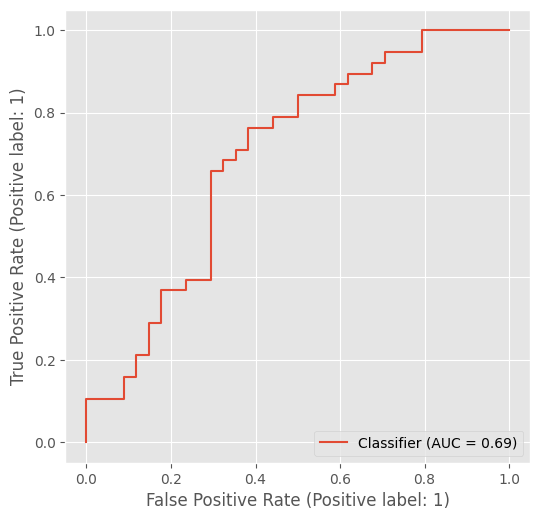

AUC score of test set: 0.69427


In [24]:
y_hat_test = log_reg_model2.predict(toyota_sales_up[96:168])
fig, ax = plt.subplots(figsize=(6,6), dpi = 100)
RocCurveDisplay.from_predictions(toyota_sales_up[96:168]['Up'], y_hat_test, ax = ax)
plt.show()
print("AUC score of test set: {:.5f}".format(roc_auc_score(toyota_sales_up[96:168]['Up'], y_hat_test)))
y_hat_test = (y_hat_test >= 1/2).astype(int)
y_hat_test = y_hat_test.reset_index().iloc[:,1]

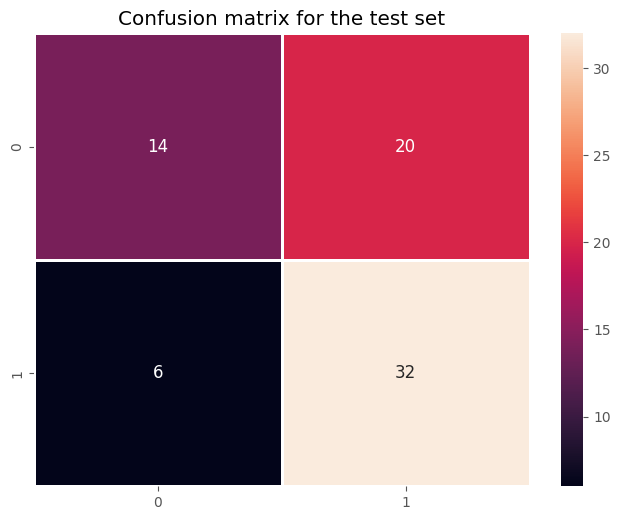

              precision    recall  f1-score   support

         0.0       0.70      0.41      0.52        34
         1.0       0.62      0.84      0.71        38

    accuracy                           0.64        72
   macro avg       0.66      0.63      0.61        72
weighted avg       0.66      0.64      0.62        72



In [25]:
fig, ax = plt.subplots(figsize = (8,6), dpi = 100)
ax.set_title("Confusion matrix for the test set")
sns.heatmap(confusion_matrix(toyota_sales_up[96:168]['Up'], y_hat_test), linewidths=1, annot=True, fmt='g', annot_kws={"fontsize":12}, ax = ax)
plt.show()
print(classification_report(toyota_sales_up[96:168]['Up'], y_hat_test))

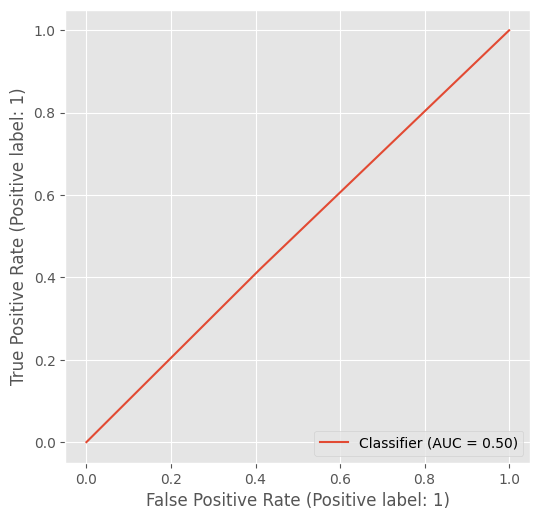

AUC score of test set: 0.50464


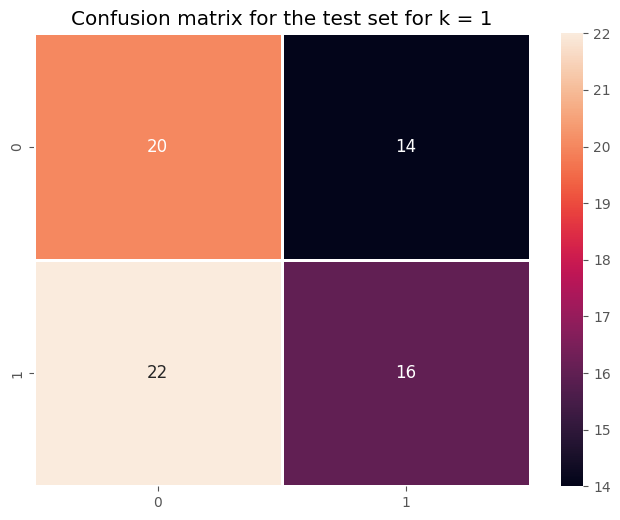

              precision    recall  f1-score   support

         0.0       0.48      0.59      0.53        34
         1.0       0.53      0.42      0.47        38

    accuracy                           0.50        72
   macro avg       0.50      0.50      0.50        72
weighted avg       0.51      0.50      0.50        72


--------------------------------------------------------



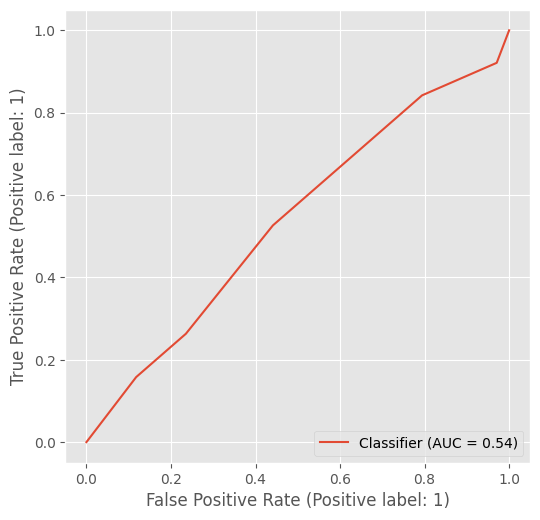

AUC score of test set: 0.54063


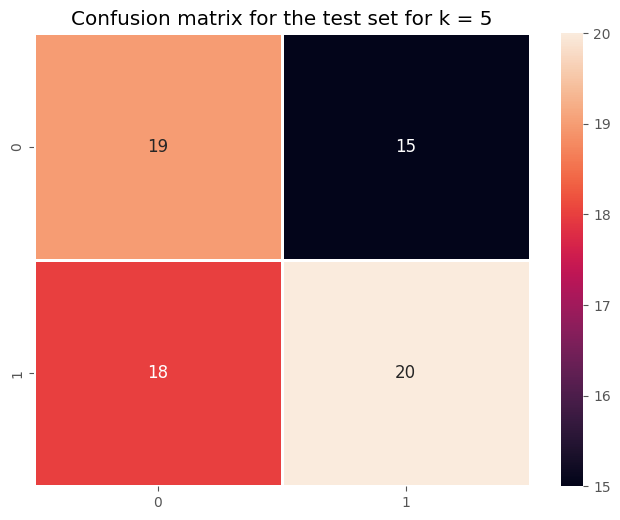

              precision    recall  f1-score   support

         0.0       0.51      0.56      0.54        34
         1.0       0.57      0.53      0.55        38

    accuracy                           0.54        72
   macro avg       0.54      0.54      0.54        72
weighted avg       0.54      0.54      0.54        72


--------------------------------------------------------



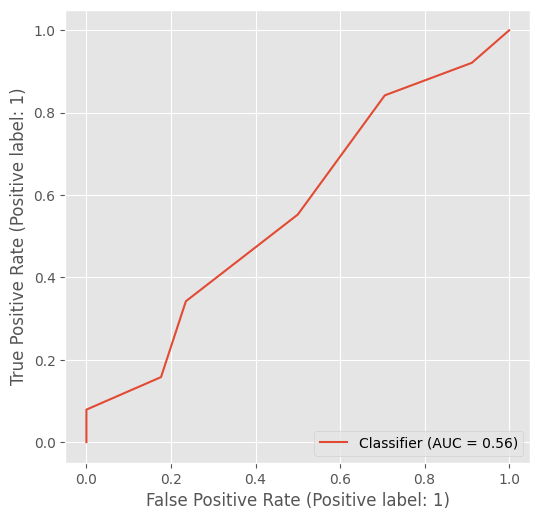

AUC score of test set: 0.56385


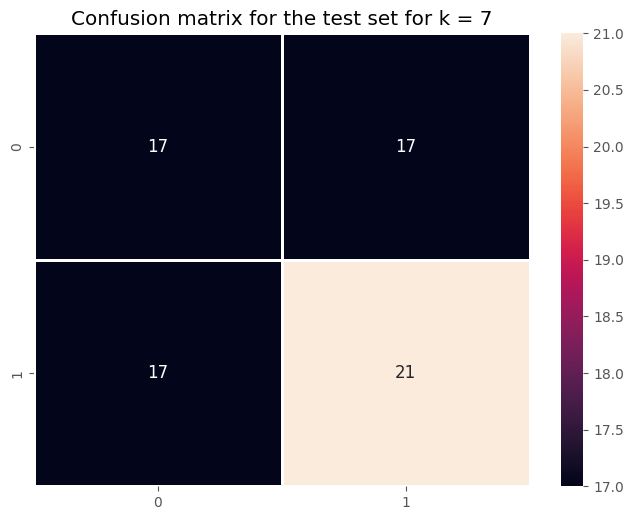

              precision    recall  f1-score   support

         0.0       0.50      0.50      0.50        34
         1.0       0.55      0.55      0.55        38

    accuracy                           0.53        72
   macro avg       0.53      0.53      0.53        72
weighted avg       0.53      0.53      0.53        72


--------------------------------------------------------



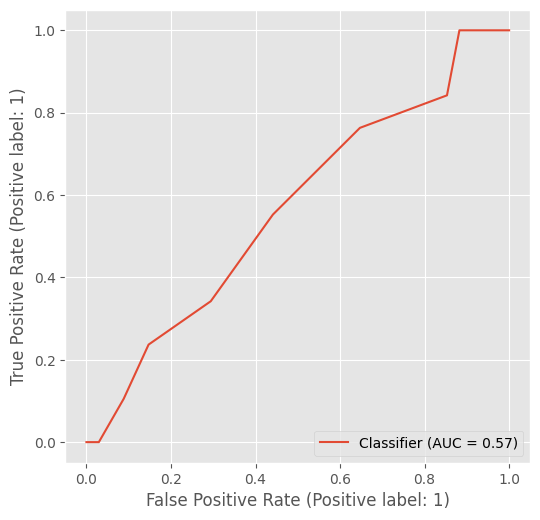

AUC score of test set: 0.56695


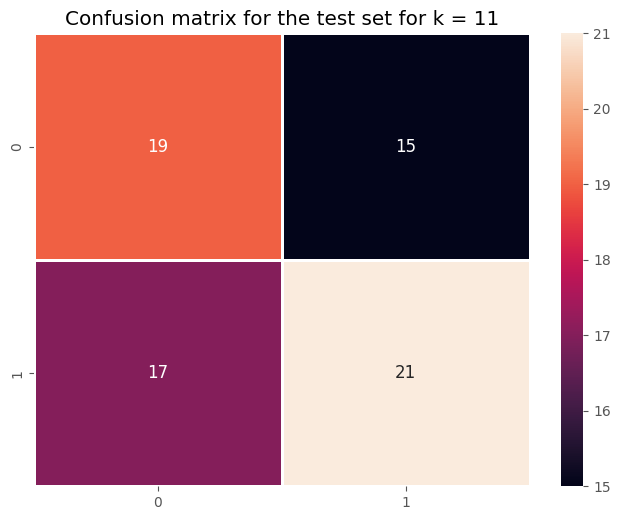

              precision    recall  f1-score   support

         0.0       0.53      0.56      0.54        34
         1.0       0.58      0.55      0.57        38

    accuracy                           0.56        72
   macro avg       0.56      0.56      0.56        72
weighted avg       0.56      0.56      0.56        72


--------------------------------------------------------



In [26]:
for i in ([1,5,7,11]):
    knn = neighbors.KNeighborsRegressor(i, weights='uniform') 
    knn_model1 = knn.fit(toyota_sales_up[['Lag1','Lag2','Lag3']][4:96], toyota_sales_up[4:96]['Up'])
    y_hat_test = knn_model1.predict(toyota_sales_up[['Lag1','Lag2','Lag3']][96:168])
    fig, ax = plt.subplots(figsize=(6,6), dpi = 100)
    RocCurveDisplay.from_predictions(toyota_sales_up[96:168]['Up'], y_hat_test, ax = ax)
    plt.show()
    print("AUC score of test set: {:.5f}".format(roc_auc_score(toyota_sales_up[96:168]['Up'], y_hat_test)))
    y_hat_test = (y_hat_test >= 0.5).astype(int)
    fig, ax = plt.subplots(figsize = (8,6), dpi = 100)
    ax.set_title("Confusion matrix for the test set for k = {}". format(i))
    sns.heatmap(confusion_matrix(toyota_sales_up[96:168]['Up'], y_hat_test), linewidths=1, annot=True, fmt='g', annot_kws={"fontsize":12}, ax = ax)
    plt.show()
    print(classification_report(toyota_sales_up[96:168]['Up'], y_hat_test))
    print("\n--------------------------------------------------------\n")
